## INITIAL PREPROCESSING

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

file_path = 'SingaporeResidentsByAgeGroupEthnicGroupAndGender (1).csv'
singapore_residents_data = pd.read_csv(file_path)

In [ ]:
singapore_residents_data.shape

(376, 68)

In [ ]:
singapore_residents_data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Number
0,Data Series,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,1966,1965,1964,1963,1962,1961,1960,1959,1958,1957
1,Total Residents,4149253,4073239,3986842,4044210,4026209,3994283,3965796,3933559,3902690,...,1934400,1886900,1841600,1795000,1750200,1702400,1646400,1587200,1518800,1445929
2,0 - 4 Years,175268,178085,178435,183076,185355,185528,187653,187160,183575,...,289600,293500,299900,303000,306100,303700,297000,288800,277800,264727
3,5 - 9 Years,201974,201360,198760,198737,197775,199066,200575,201509,204452,...,297600,291100,284000,276000,266700,258900,250300,241000,229600,218097
4,10 - 14 Years,204459,202379,199993,206393,207926,206530,206253,207495,214388,...,257300,248500,240200,232000,223900,217400,200300,175700,157100,136280


 we have unnecessary 1st row of unnamed columns name handling that

In [ ]:
# First row as column
singapore_residents_data.columns = singapore_residents_data.iloc[0]

# Remaining rows as rows of the data
singapore_residents_data = singapore_residents_data[1:]

# Convert column names to strings
singapore_residents_data.columns = [str(col) for col in singapore_residents_data.columns]

In [ ]:
singapore_residents_data

,Data Series,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,1966,1965,1964,1963,1962,1961,1960,1959,1958,1957
1,Total Residents,4149253,4073239,3986842,4044210,4026209,3994283,3965796,3933559,3902690,...,1934400,1886900,1841600,1795000,1750200,1702400,1646400,1587200,1518800,1445929
2,0 - 4 Years,175268,178085,178435,183076,185355,185528,187653,187160,183575,...,289600,293500,299900,303000,306100,303700,297000,288800,277800,264727
3,5 - 9 Years,201974,201360,198760,198737,197775,199066,200575,201509,204452,...,297600,291100,284000,276000,266700,258900,250300,241000,229600,218097
4,10 - 14 Years,204459,202379,199993,206393,207926,206530,206253,207495,214388,...,257300,248500,240200,232000,223900,217400,200300,175700,157100,136280
5,15 - 19 Years,209579,206749,204913,215234,222222,226520,232973,239771,242902,...,215200,198600,175800,159000,140000,124900,124700,131500,134300,135679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,70 Years & Over,2697,2483,2295,2328,2197,2087,1948,1832,1800,...,400,400,400,400,400,400,400,400,400,305
372,75 Years & Over,1529,1423,1318,1337,1348,1362,1324,1305,1279,...,na,na,na,na,na,na,na,na,na,140
373,80 Years & Over,910,907,902,897,858,842,818,785,767,...,na,na,na,na,na,na,na,na,na,66
374,85 Years & Over,501,510,487,474,454,437,418,411,379,...,na,na,na,na,na,na,na,na,na,25


In [ ]:
singapore_residents_data.replace('na', np.nan, inplace=True)

In [ ]:
print(singapore_residents_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 1 to 375
Data columns (total 68 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data Series  375 non-null    object
 1   2023         375 non-null    int64 
 2   2022         375 non-null    int64 
 3   2021         375 non-null    int64 
 4   2020         375 non-null    int64 
 5   2019         375 non-null    int64 
 6   2018         375 non-null    int64 
 7   2017         375 non-null    int64 
 8   2016         375 non-null    int64 
 9   2015         375 non-null    int64 
 10  2014         375 non-null    int64 
 11  2013         375 non-null    int64 
 12  2012         375 non-null    int64 
 13  2011         375 non-null    int64 
 14  2010         375 non-null    int64 
 15  2009         375 non-null    int64 
 16  2008         375 non-null    int64 
 17  2007         375 non-null    int64 
 18  2006         375 non-null    int64 
 19  2005         375 non-null    

In [ ]:
# check for missing values
missing_values=singapore_residents_data.isna().sum()
print(missing_values)
#fill the missing values with 0
singapore_residents_data=singapore_residents_data.fillna(0)

Data Series      0
2023             0
2022             0
2021             0
2020             0
              ... 
1961           120
1960           120
1959           120
1958           120
1957            30
Length: 68, dtype: int64


In [ ]:
print(singapore_residents_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 1 to 375
Data columns (total 68 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data Series  375 non-null    object
 1   2023         375 non-null    int64 
 2   2022         375 non-null    int64 
 3   2021         375 non-null    int64 
 4   2020         375 non-null    int64 
 5   2019         375 non-null    int64 
 6   2018         375 non-null    int64 
 7   2017         375 non-null    int64 
 8   2016         375 non-null    int64 
 9   2015         375 non-null    int64 
 10  2014         375 non-null    int64 
 11  2013         375 non-null    int64 
 12  2012         375 non-null    int64 
 13  2011         375 non-null    int64 
 14  2010         375 non-null    int64 
 15  2009         375 non-null    int64 
 16  2008         375 non-null    int64 
 17  2007         375 non-null    int64 
 18  2006         375 non-null    int64 
 19  2005         375 non-null    

In [ ]:
singapore_residents_data.iloc[:, 1:] = singapore_residents_data.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

In [ ]:
singapore_residents_data

,Data Series,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,1966,1965,1964,1963,1962,1961,1960,1959,1958,1957
1,Total Residents,4149253,4073239,3986842,4044210,4026209,3994283,3965796,3933559,3902690,...,1934400,1886900,1841600,1795000,1750200,1702400,1646400,1587200,1518800,1445929
2,0 - 4 Years,175268,178085,178435,183076,185355,185528,187653,187160,183575,...,289600,293500,299900,303000,306100,303700,297000,288800,277800,264727
3,5 - 9 Years,201974,201360,198760,198737,197775,199066,200575,201509,204452,...,297600,291100,284000,276000,266700,258900,250300,241000,229600,218097
4,10 - 14 Years,204459,202379,199993,206393,207926,206530,206253,207495,214388,...,257300,248500,240200,232000,223900,217400,200300,175700,157100,136280
5,15 - 19 Years,209579,206749,204913,215234,222222,226520,232973,239771,242902,...,215200,198600,175800,159000,140000,124900,124700,131500,134300,135679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,70 Years & Over,2697,2483,2295,2328,2197,2087,1948,1832,1800,...,400,400,400,400,400,400,400,400,400,305
372,75 Years & Over,1529,1423,1318,1337,1348,1362,1324,1305,1279,...,0,0,0,0,0,0,0,0,0,140
373,80 Years & Over,910,907,902,897,858,842,818,785,767,...,0,0,0,0,0,0,0,0,0,66
374,85 Years & Over,501,510,487,474,454,437,418,411,379,...,0,0,0,0,0,0,0,0,0,25


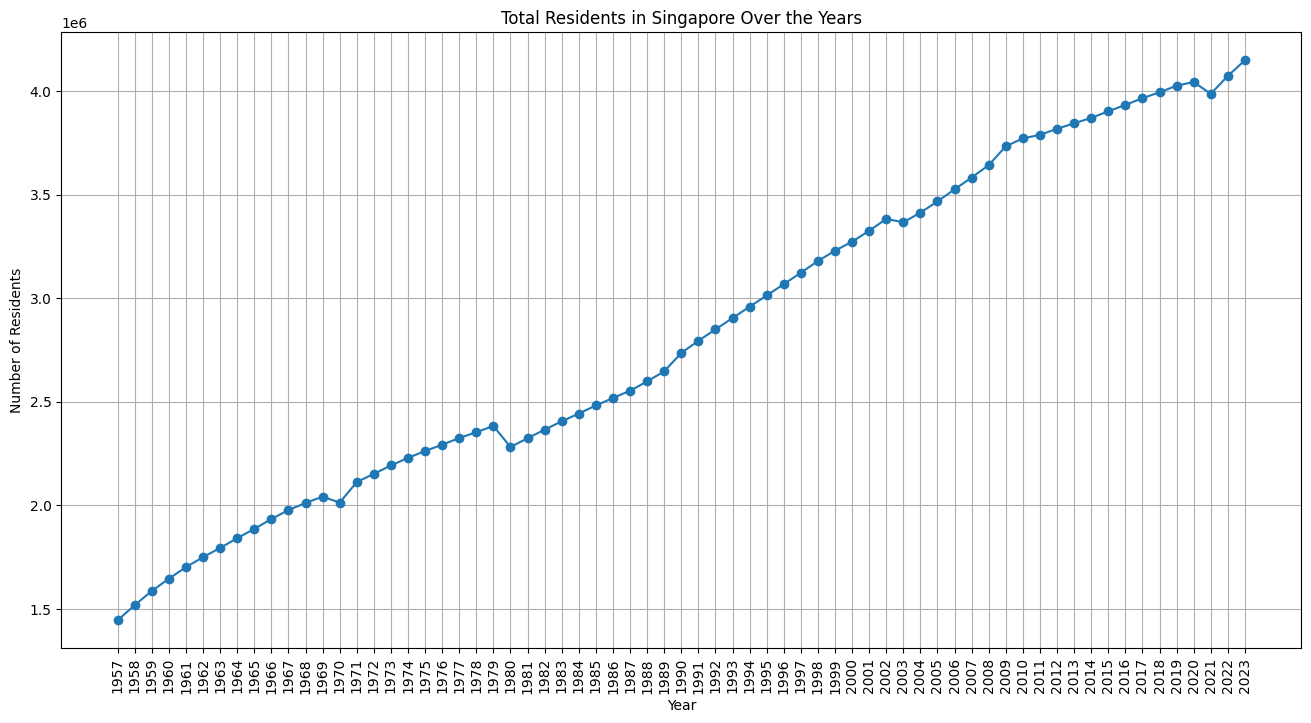

In [ ]:
df_transposed = singapore_residents_data.set_index('Data Series').T

df_transposed.index = pd.to_numeric(df_transposed.index)

df_transposed = df_transposed.sort_index()



plt.figure(figsize=(16, 8))
plt.plot(df_transposed.index, df_transposed['Total Residents'], marker='o')
plt.title('Total Residents in Singapore Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Residents')
plt.grid(True)

plt.xticks(df_transposed.index, rotation=90)

plt.show()

In [ ]:
# Save the cleaned dataset to a CSV file
cleaned_file_path = 'SingaporeResidents_Cleaned.csv'
singapore_residents_data.to_csv(cleaned_file_path, index=False)

cleaned_file_path

'SingaporeResidents_Cleaned.csv'

## Hypothesis - 1

In [ ]:
# Load the provided cleaned dataset for analysis
cleaned_dataset_path = "SingaporeResidents_Cleaned.csv"

# Load the cleaned dataset to verify its structure
cleaned_data = pd.read_csv(cleaned_dataset_path)
cleaned_data.head(), cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 68 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data Series  375 non-null    object
 1   2023         375 non-null    int64 
 2   2022         375 non-null    int64 
 3   2021         375 non-null    int64 
 4   2020         375 non-null    int64 
 5   2019         375 non-null    int64 
 6   2018         375 non-null    int64 
 7   2017         375 non-null    int64 
 8   2016         375 non-null    int64 
 9   2015         375 non-null    int64 
 10  2014         375 non-null    int64 
 11  2013         375 non-null    int64 
 12  2012         375 non-null    int64 
 13  2011         375 non-null    int64 
 14  2010         375 non-null    int64 
 15  2009         375 non-null    int64 
 16  2008         375 non-null    int64 
 17  2007         375 non-null    int64 
 18  2006         375 non-null    int64 
 19  2005         375 non-null    

(       Data Series     2023     2022     2021     2020     2019     2018  \
 0  Total Residents  4149253  4073239  3986842  4044210  4026209  3994283   
 1      0 - 4 Years   175268   178085   178435   183076   185355   185528   
 2      5 - 9 Years   201974   201360   198760   198737   197775   199066   
 3    10 - 14 Years   204459   202379   199993   206393   207926   206530   
 4    15 - 19 Years   209579   206749   204913   215234   222222   226520   
 
       2017     2016     2015  ...     1966     1965     1964     1963  \
 0  3965796  3933559  3902690  ...  1934400  1886900  1841600  1795000   
 1   187653   187160   183575  ...   289600   293500   299900   303000   
 2   200575   201509   204452  ...   297600   291100   284000   276000   
 3   206253   207495   214388  ...   257300   248500   240200   232000   
 4   232973   239771   242902  ...   215200   198600   175800   159000   
 
       1962     1961     1960     1959     1958     1957  
 0  1750200  1702400  1646400  

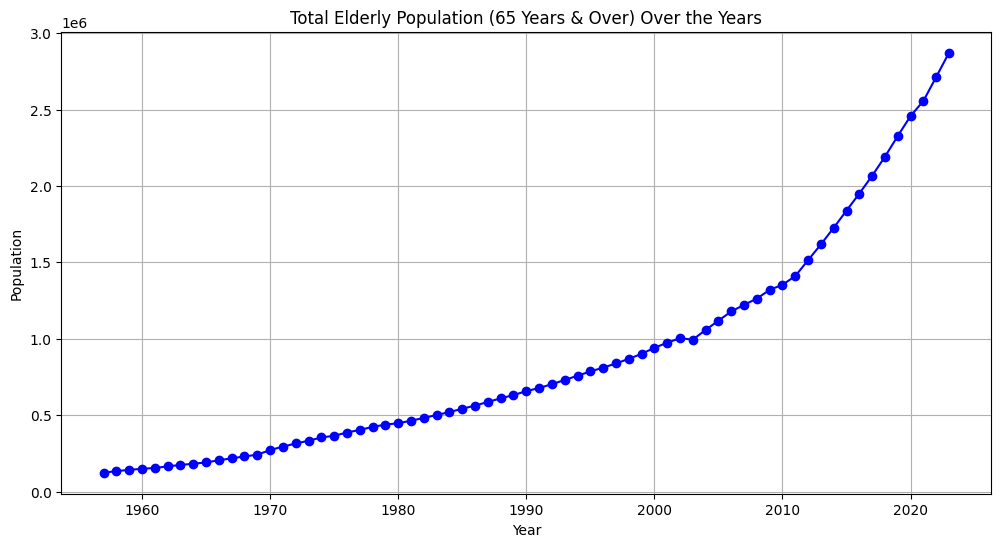

{'Trend Slope': 33640.30840450156,
 'Intercept': -66068527.710032724,
 'R-squared': 0.8513944870693422,
 'P-value': 1.314492880803979e-28,
 'Standard Error': 1743.2325798442055}

In [ ]:
# Filter for the "65 Years & Over" category
elderly_data_cleaned = cleaned_data[cleaned_data["Data Series"].str.contains("65 Years & Over", case=False, na=False)]

# Transpose the data for time-series analysis
elderly_data_cleaned = elderly_data_cleaned.set_index("Data Series").T
elderly_data_cleaned.index = elderly_data_cleaned.index.astype(int)  # Convert years to numeric
elderly_population = elderly_data_cleaned.sum(axis=1)  # Aggregate subcategories

# Proceed with plotting and statistical analysis
plt.figure(figsize=(12, 6))
elderly_population.plot(marker="o", color="blue")
plt.title("Total Elderly Population (65 Years & Over) Over the Years")
plt.xlabel("Year")
plt.ylabel("Population")
plt.grid(True)
plt.show()

# Perform statistical regression
slope, intercept, r_value, p_value, std_err = linregress(elderly_population.index, elderly_population.values)
hypothesis1_results = {
    "Trend Slope": slope,
    "Intercept": intercept,
    "R-squared": r_value**2,
    "P-value": p_value,
    "Standard Error": std_err,
}
hypothesis1_results


## Hypothesis 2

---
**Visualization:**

The line chart displays the male-to-female ratio over the years, indicating relative stability with minor fluctuations.

Statistical Analysis:

Chi-square Test:

Chi-square Value: 71,309.95, indicating differences in observed versus expected
gender ratios.

P-value: 0.0, signifying statistically significant deviations.

Degrees of Freedom: 66, reflecting the number of comparisons made.

Expected Frequencies: Calculated population distributions for "Male" and "Female."

Conclusion for Hypothesis 2:

While the gender ratio trend appears visually stable, the chi-square test identifies statistically significant deviations. These deviations may be linked to demographic policies, social trends, or data variability over the years. This partially supports the hypothesis of stability but highlights specific periods of change.


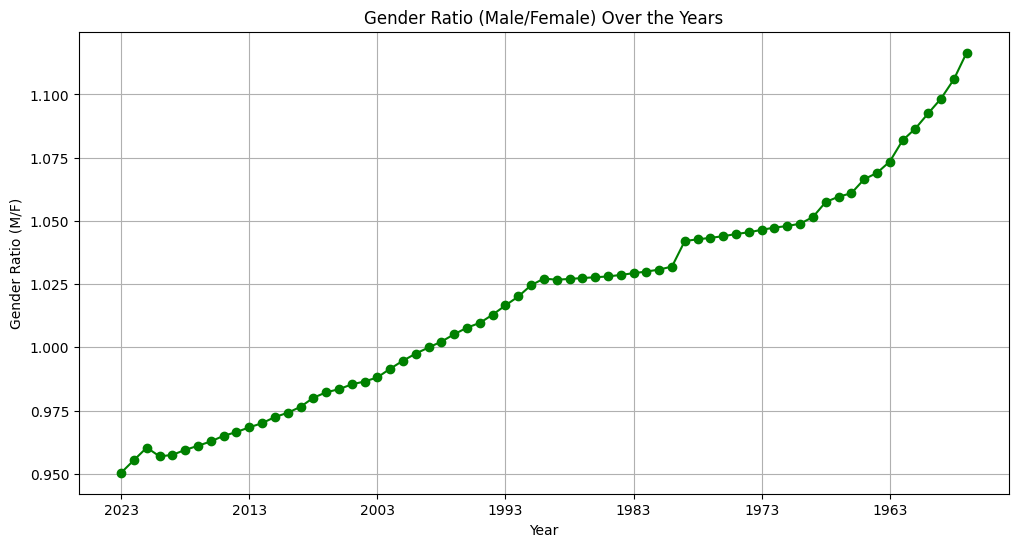

{'Chi-square': 71309.94823800458,
 'P-value': 0.0,
 'Degrees of Freedom': 66,
 'Expected Frequencies': array([[2081010.90630742, 2042886.9444685 , 1999555.5064308 ,
         2028327.777891  , 2019299.57996611, 2003287.45580912,
         1989000.12320058, 1972832.02051158, 1957350.02274793,
         1941325.36012374, 1928291.37269681, 1914977.52668192,
         1900455.97550603, 1891664.00230325, 1872683.27065126,
         1826934.41613681, 1797054.24571455, 1768372.25121821,
         1739242.88421207, 1711884.95185237, 1688626.0951907 ,
         1696677.29575113, 1668068.52590326, 1641718.184768  ,
         1619809.97179345, 1594902.05592523, 1566507.44309719,
         1538786.39672729, 1511394.35973681, 1484229.01823335,
         1456742.6919695 , 1429261.88263121, 1401652.17785008,
         1372143.64759572, 1327887.37221712, 1303226.71492215,
         1280861.09866402, 1263174.83836608, 1245126.968674  ,
         1225612.59985785, 1206784.83750574, 1186493.083723  ,
         1165778

In [ ]:
# Filter data for "Total Male Residents" and "Total Female Residents"
male_population = cleaned_data[cleaned_data["Data Series"] == "Total Male Residents"].iloc[:, 1:]
female_population = cleaned_data[cleaned_data["Data Series"] == "Total Female Residents"].iloc[:, 1:]

# Convert the year columns to numeric for calculation
male_population = male_population.T.astype(int).squeeze()
female_population = female_population.T.astype(int).squeeze()

# Calculate the gender ratio (Male/Female) for each year
gender_ratio = male_population / female_population

# Plot the gender ratio over time
plt.figure(figsize=(12, 6))
gender_ratio.plot(marker="o", color="green")
plt.title("Gender Ratio (Male/Female) Over the Years")
plt.xlabel("Year")
plt.ylabel("Gender Ratio (M/F)")
plt.grid(True)
plt.show()

# Perform a chi-square test for gender ratio stability
from scipy.stats import chi2_contingency

# Create a contingency table for chi-square test (male vs. female populations)
contingency_table = pd.DataFrame({"Male": male_population, "Female": female_population}).T
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Results
hypothesis2_results = {
    "Chi-square": chi2,
    "P-value": p,
    "Degrees of Freedom": dof,
    "Expected Frequencies": expected,
}
hypothesis2_results


## Hypothesis - 3


Partial Acceptance of the Hypothesis

The hypothesis is partially accepted, with some important nuances:

Variation in growth rates: The data supports the first part of the hypothesis that population growth rates vary among different ethnic groups. The "Other Ethnic Groups" category showed the highest average growth rate (3.07%), followed by Indians (1.71%), Malays (1.61%), and Chinese (1.59%).

Statistical significance: However, the one-way ANOVA test resulted in a p-value of 0.5001, which is greater than the conventional significance level of 0.05. This suggests that while there are observable differences in growth rates, they are not statistically significant when considered over the entire period.

<ipython-input-17-6d0c38ab1996>:30: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  growth_rates = ethnic_data.pct_change()


Average Growth Rates:
Data Series
total malays                   0.016124
total chinese                  0.015886
total indians                  0.017086
other ethnic groups (total)    0.030742
dtype: float64


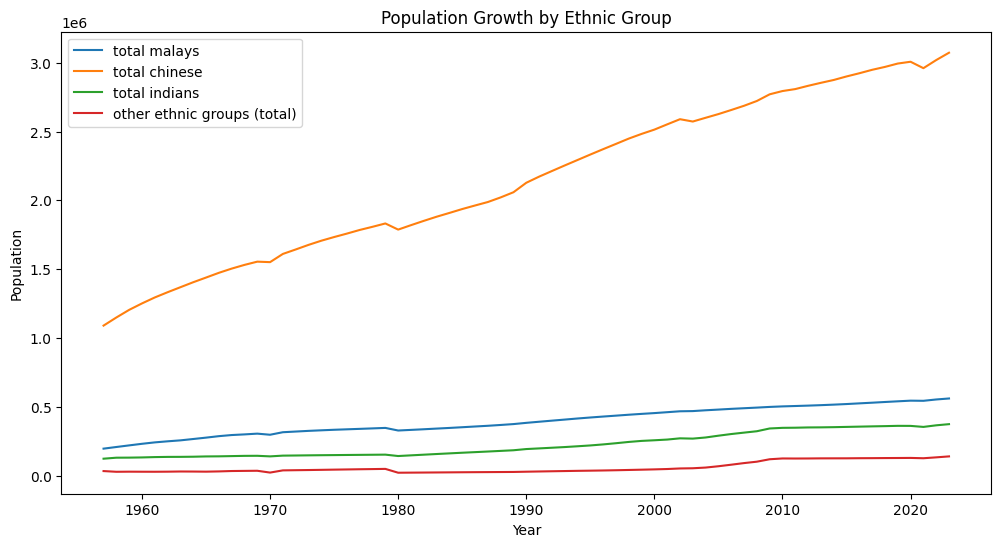


One-way ANOVA results:
F-statistic: 0.7905731451210997
p-value: 0.5000896613273356

Average Growth Rates Before Policy Change:
Data Series
total malays                   0.020018
total chinese                  0.019851
total indians                  0.017341
other ethnic groups (total)    0.019178
dtype: float64

Average Growth Rates After Policy Change:
Data Series
total malays                   0.009310
total chinese                  0.008946
total indians                  0.016640
other ethnic groups (total)    0.050980
dtype: float64

Total chinese:
t-statistic: 3.943539084163988
p-value: 0.00020171764779298228

Total malays:
t-statistic: 2.6054820058088737
p-value: 0.011397196552912013

Total indians:
t-statistic: 0.13697258473839902
p-value: 0.8914824525235183

Other ethnic groups (total):
t-statistic: -0.9662598829520689
p-value: 0.3375513595073245
null hypo is true


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Extract data for main ethnic groups
ethnic_groups = ['Total Chinese', 'Total Malays', 'Total Indians', 'Other Ethnic Groups (Total)']

singapore_residents_data["Data Series"] = singapore_residents_data["Data Series"].str.strip().str.lower()
ethnic_groups  = [group.strip().lower() for group in ethnic_groups ]
ethnic_data = singapore_residents_data[singapore_residents_data['Data Series'].isin(ethnic_groups)]


ethnic_data




# Set 'Data Series' as index and transpose the dataframe
ethnic_data = ethnic_data.set_index('Data Series').T

# Convert index to datetime
ethnic_data.index = pd.to_datetime(ethnic_data.index, format='%Y')

# Sort index in ascending order
ethnic_data = ethnic_data.sort_index()

# Calculate year-over-year growth rates
growth_rates = ethnic_data.pct_change()

# Calculate average growth rates
avg_growth_rates = growth_rates.mean()
print("Average Growth Rates:")
print(avg_growth_rates)

# Visualize growth trends
plt.figure(figsize=(12, 6))
for column in ethnic_data.columns:
    plt.plot(ethnic_data.index, ethnic_data[column], label=column)

plt.title('Population Growth by Ethnic Group')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.show()

# Perform one-way ANOVA
growth_data = [growth_rates[group].dropna() for group in ethnic_groups]
f_statistic, p_value = stats.f_oneway(*growth_data)

print(f"\nOne-way ANOVA results:")
print(f"F-statistic: {f_statistic}")
print(f"p-value: {p_value}")

# Analyze impact of a hypothetical policy change in 2000
policy_change_year = 2000

pre_policy = growth_rates[growth_rates.index.year < policy_change_year]
post_policy = growth_rates[growth_rates.index.year >= policy_change_year]

# Calculate average growth rates before and after policy change
pre_policy_avg = pre_policy.mean()
post_policy_avg = post_policy.mean()

print("\nAverage Growth Rates Before Policy Change:")
print(pre_policy_avg)
print("\nAverage Growth Rates After Policy Change:")
print(post_policy_avg)

# Perform t-tests to compare pre and post policy growth rates
for group in ethnic_groups:
    t_statistic, p_value = stats.ttest_ind(pre_policy[group].dropna(), post_policy[group].dropna())
    print(f"\n{group.capitalize()}:")
    print(f"t-statistic: {t_statistic}")
    print(f"p-value: {p_value}")

print('null hypo is true')


## Hypothesis - 4

Under 20 population for each Year:
    Year  Under_20_Population
0   2023            3165120.0
1   2022            3154292.0
2   2021            3128404.0
3   2020            3213760.0
4   2019            3253112.0
..   ...                  ...
62  1961            3619600.0
63  1960            3489200.0
64  1959            3348000.0
65  1958            3195200.0
66  1957            3019132.0

[67 rows x 2 columns]


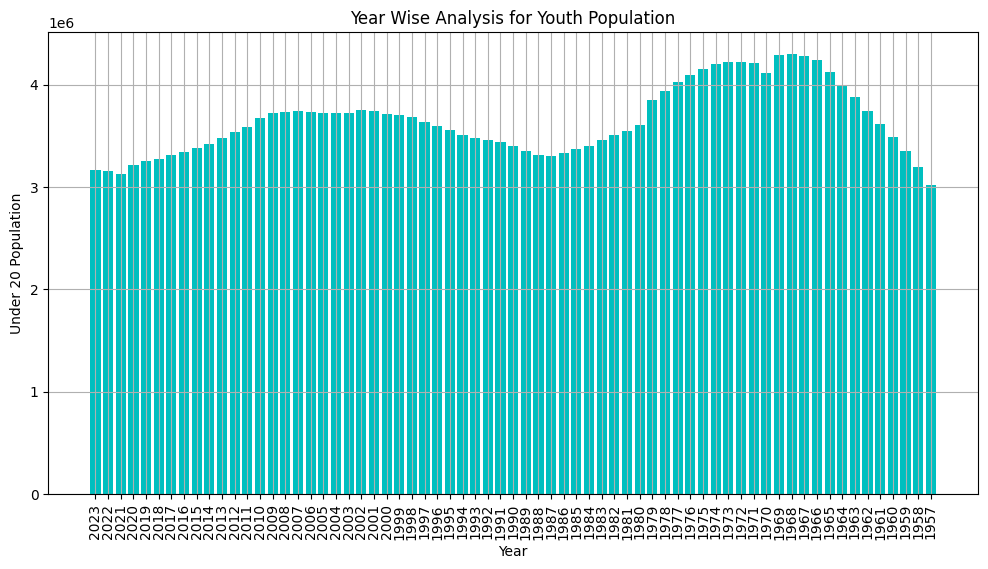

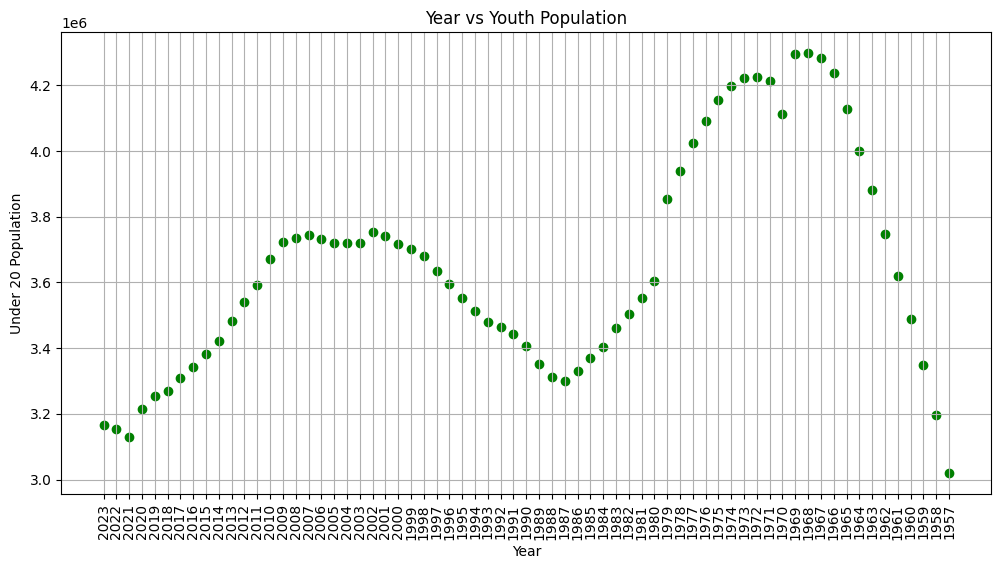

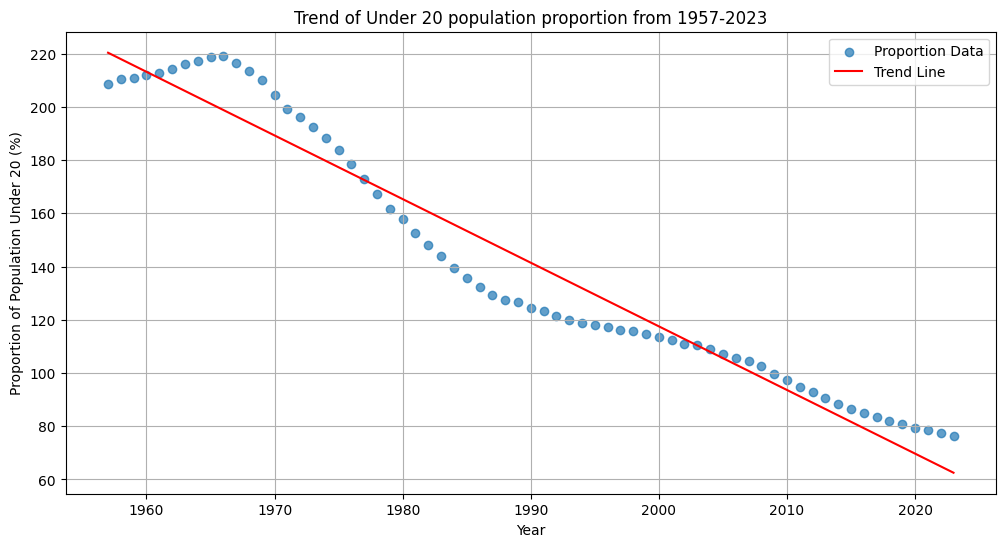

Result of the Hypothesis conducted:
Slope: -2.3912695873026446
Intercept: 4900.084494648204
R-squared: 0.9461626020859147
P-value: 5.830343056120956e-43
Standard Error: 0.07075074277555482
P VALUE GREATER THAN 0.05 THEREFORE FAIL TO REJECT THE NULL HYPOTHESIS THEREFORE NULL HYPOTHESIS IS TRUE


In [ ]:
# Get relevant age groups for "under 20 years"
age_groups = ["0 - 4 Years", "5 - 9 Years", "10 - 14 Years", "15 - 19 Years"]
singapore_residents_data["Data Series"] = singapore_residents_data["Data Series"].str.strip().str.lower()
age_groups = [group.strip().lower() for group in age_groups]

# Get only column names which are years
population_columns = [col for col in singapore_residents_data.columns if col.isdigit()]

# Extract data for the youth population
youth_population_data = singapore_residents_data[singapore_residents_data["Data Series"].isin(age_groups)]

# Set the index to 'Data Series' and keep only population columns
youth_population_data = youth_population_data.set_index("Data Series")[population_columns].astype(float)




## DATASET FOR POPULATION UNDER 20


# Calculate the total youth population under 20 years by summing relevant age groups
youth_population_data.loc["Under 20"] = youth_population_data.sum()



#DataFrame with 'Year' and 'Total Population Under 20'
total_youth_population = youth_population_data.loc["Under 20"].reset_index()
total_youth_population.columns = ["Year", "Under_20_Population"]

# Display the DataFrame with year and total population under 20
print("Under 20 population for each Year:")
print(total_youth_population)



## ANALYSIS

plt.figure(figsize=(12, 6))
plt.bar(total_youth_population["Year"], total_youth_population["Under_20_Population"], color='c')
plt.title("Year Wise Analysis for Youth Population")
plt.xlabel("Year")
plt.ylabel("Under 20 Population")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


# Scatter Plot - Showing the relationship between Year and Youth Population
plt.figure(figsize=(12, 6))
plt.scatter(total_youth_population["Year"], total_youth_population["Under_20_Population"], color='g')
plt.title("Year vs Youth Population")
plt.xlabel("Year")
plt.ylabel("Under 20 Population")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()




## TESTING THE HYPOTHESIS

# Extract total resident population for normalization
total_population = singapore_residents_data[singapore_residents_data["Data Series"] == "total residents"]
total_population = total_population.set_index("Data Series")[population_columns].astype(float)

# Calculate the proportion of youth population under 20 years
proportion_under_20 = (youth_population_data.loc["Under 20"] / total_population.loc["total residents"]) * 100
proportion_under_20 = proportion_under_20.rename_axis("Year").reset_index()
proportion_under_20.columns = ["Year", "Proportion_Under_20"]
proportion_under_20["Year"] = proportion_under_20["Year"].astype(int)





# Perform a linear regression for testing the hypothesis
x = proportion_under_20["Year"]
y = proportion_under_20["Proportion_Under_20"]
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Plot the data and the regression line
plt.figure(figsize=(12, 6))
plt.scatter(x, y, label="Proportion Data", alpha=0.7)
plt.plot(x, intercept + slope * x, color='red', label="Trend Line")
plt.title("Trend of Under 20 population proportion from 1957-2023")
plt.xlabel("Year")
plt.ylabel("Proportion of Population Under 20 (%)")
plt.legend()
plt.grid(True)
plt.show()

# Display the regression results
hypotest_result = {
    "Slope": slope,
    "Intercept": intercept,
    "R-squared": r_value**2,
    "P-value": p_value,
    "Standard Error": std_err
}

print("Result of the Hypothesis conducted:")
for key, value in hypotest_result.items():
    print(f"{key}: {value}")

print("P VALUE GREATER THAN 0.05 THEREFORE FAIL TO REJECT THE NULL HYPOTHESIS THEREFORE NULL HYPOTHESIS IS TRUE")

## Hypothesis - 5


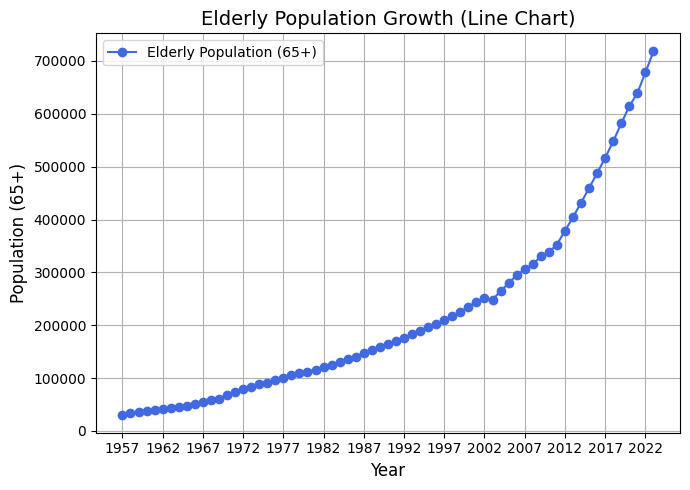

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Extract years and population
years = list(singapore_residents_data.columns)[1:]
population = list(singapore_residents_data.iloc[19,:])[1:]
years = pd.to_numeric(years, errors='coerce')  # Attempts to convert years to numeric

# 1. Line Chart: Elderly Population Growth over Time
plt.figure(figsize=(7, 5))

# Set x-axis labels with 5-year increments (assuming years are numeric)
plt.xticks(np.arange(min(years), max(years) + 1, 5))  # Adjust range if needed

plt.plot(years, population, marker='o', linestyle='-', color='royalblue', label="Elderly Population (65+)")
plt.title('Elderly Population Growth (Line Chart)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population (65+)', fontsize=12)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

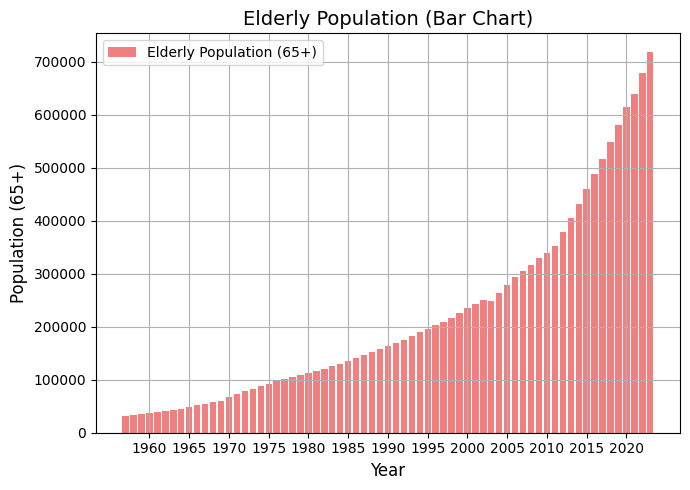

In [ ]:
major_years = years[years % 5 == 0]  # Select years divisible by 5 (every 5th year)

# 2. Bar Chart: Elderly Population in Major Years
plt.figure(figsize=(7, 5))

# Set x-axis labels with 5-year increments (assuming years are numeric)
plt.xticks(major_years)  # Use filtered major_years for x-axis ticks

plt.bar(years, population, color='lightcoral', label="Elderly Population (65+)")
plt.title('Elderly Population (Bar Chart)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population (65+)', fontsize=12)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

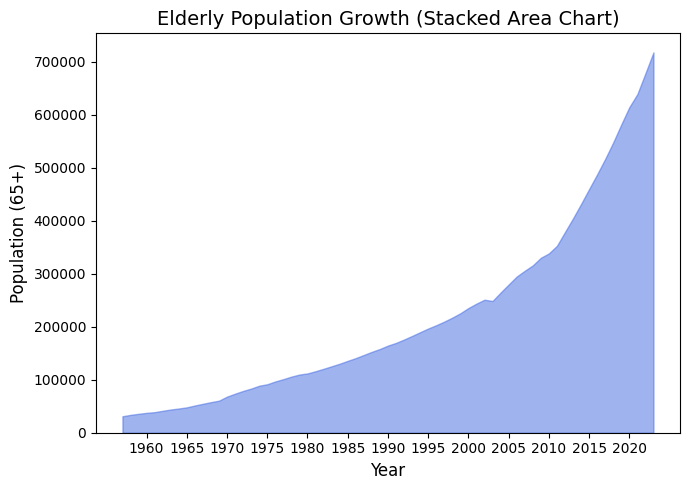

In [ ]:
# 3. Stacked Area Chart: Cumulative Growth of Elderly Population
plt.figure(figsize=(7, 5))

# Set x-axis labels with 5-year increments (assuming years are numeric)
plt.xticks(major_years)  # Use filtered major_years for x-axis ticks
plt.stackplot(years, population, color='royalblue', alpha=0.5)


plt.title('Elderly Population Growth (Stacked Area Chart)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Population (65+)', fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()

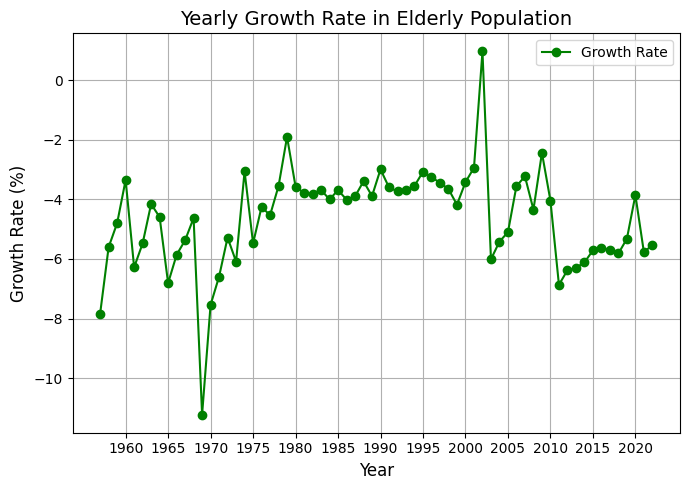

In [ ]:
# 4. Growth Rate Plot: Year-to-Year Change in Elderly Population
growth_rate = pd.Series(population).pct_change() * 100  # Percentage growth rate
plt.figure(figsize=(7, 5))

# Set x-axis labels with 5-year increments (assuming years are numeric)
plt.xticks(major_years)  # Use filtered major_years for x-axis ticks
plt.plot(years[1:], growth_rate[1:], marker='o', color='green', linestyle='-', label="Growth Rate")
plt.title('Yearly Growth Rate in Elderly Population', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Growth Rate (%)', fontsize=12)
plt.grid(True)
plt.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

## Hypothesis - 6
Working-age Population Hypothesis:
- The working-age population (20-64 years) exhibits distinct growth patterns
- These patterns align with Singapore's economic development phases

In [ ]:
# Data Preparation
# Define working age groups (20-64 years)
working_age_groups = [
    "20 - 24 years", "25 - 29 years", "30 - 34 years",
    "35 - 39 years", "40 - 44 years", "45 - 49 years",
    "50 - 54 years", "55 - 59 years", "60 - 64 years"
]

# Convert to lowercase to match data
working_age_groups = [group.strip().lower() for group in working_age_groups]

# Extract working age population data
working_age_data = singapore_residents_data[singapore_residents_data["Data Series"].isin(working_age_groups)]

# Get year columns and calculate totals
year_columns = [col for col in singapore_residents_data.columns if col.isdigit()]
working_age_total = working_age_data[year_columns].astype(float).sum()
total_population = singapore_residents_data[singapore_residents_data["Data Series"] == "total residents"][year_columns].iloc[0].astype(float)

# Calculate proportions and create DataFrame
working_age_proportion = (working_age_total / total_population) * 100
working_age_df = pd.DataFrame({
    'Year': pd.to_numeric(year_columns),
    'Working_Age_Population': working_age_total,
    'Proportion': working_age_proportion
})

# Define economic phases
economic_phases = {
    'Early Industrialization': (1957, 1970),
    'Export-oriented Industrialization': (1971, 1985),
    'Services and High-tech': (1986, 2000),
    'Knowledge-based Economy': (2001, 2023)
}

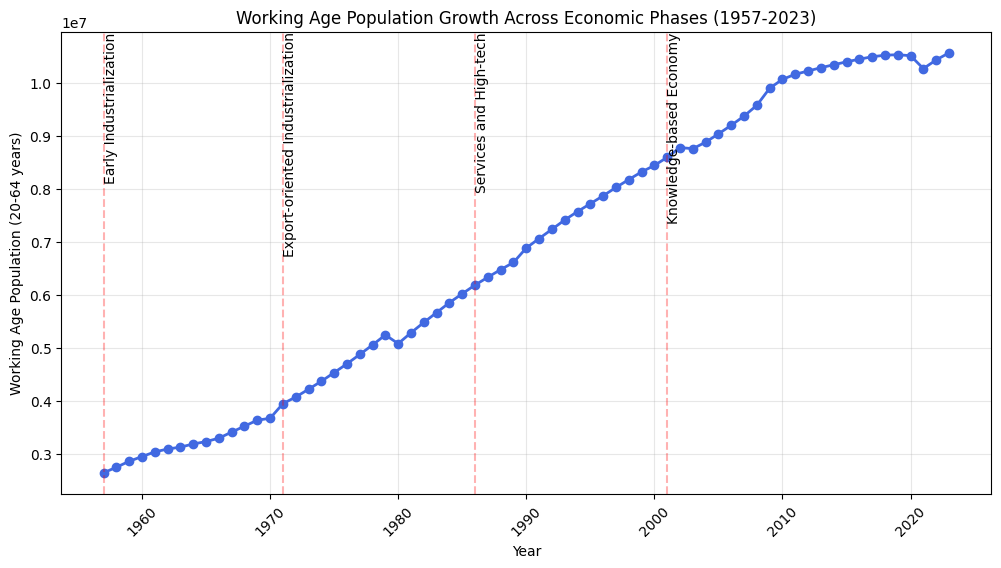

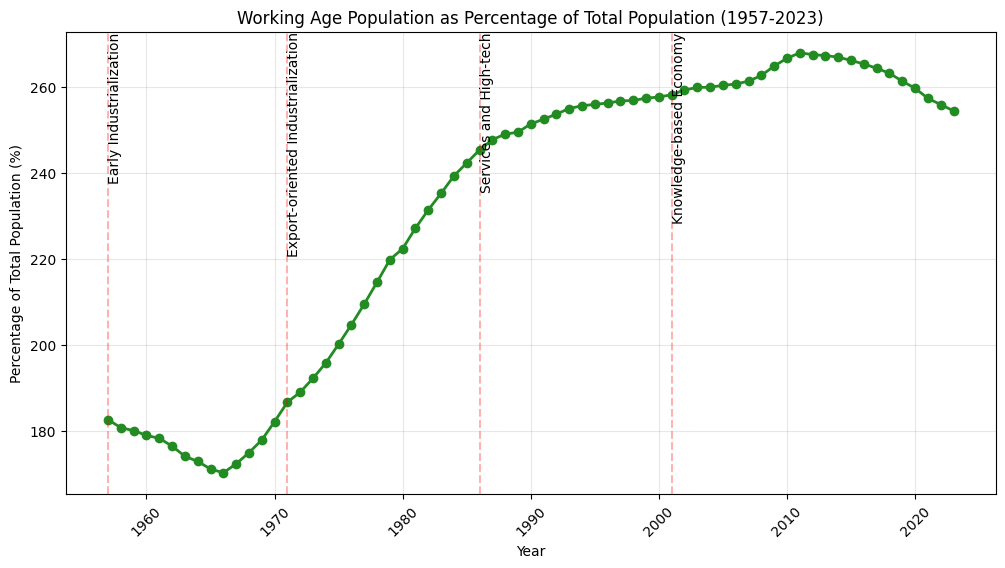

In [ ]:
# Visualizations
# Plot 1: Working Age Population Growth
plt.figure(figsize=(12, 6))
plt.plot(working_age_df['Year'], working_age_df['Working_Age_Population'], marker='o', linewidth=2, color='royalblue')
# Add vertical lines for economic phases
for phase, (start, end) in economic_phases.items():
    plt.axvline(x=start, color='r', linestyle='--', alpha=0.3)
    plt.text(start, plt.ylim()[1], phase, rotation=90, va='top')
plt.title('Working Age Population Growth Across Economic Phases (1957-2023)', fontsize=12)
plt.xlabel('Year')
plt.ylabel('Working Age Population (20-64 years)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.show()

# Plot 2: Working Age Population Proportion
plt.figure(figsize=(12, 6))
plt.plot(working_age_df['Year'], working_age_df['Proportion'], marker='o', color='forestgreen', linewidth=2)
# Add vertical lines for economic phases
for phase, (start, end) in economic_phases.items():
    plt.axvline(x=start, color='r', linestyle='--', alpha=0.3)
    plt.text(start, plt.ylim()[1], phase, rotation=90, va='top')
plt.title('Working Age Population as Percentage of Total Population (1957-2023)', fontsize=12)
plt.xlabel('Year')
plt.ylabel('Percentage of Total Population (%)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Statistical Analysis with Two Inferential Tests
# Test 1: One-way ANOVA
from scipy.stats import f_oneway
print("\n=== INFERENTIAL TEST 1: One-way ANOVA ===")
phase_populations = []

for phase, (start, end) in economic_phases.items():
    phase_data = working_age_df[(working_age_df['Year'] >= start) & (working_age_df['Year'] <= end)]['Working_Age_Population']
    phase_populations.append(phase_data)

f_statistic, anova_p_value = f_oneway(*phase_populations)

print("\nOne-way ANOVA Results:")
print(f"F-statistic: {f_statistic:.2f}")
print(f"P-value: {anova_p_value:.10f}")

# Test 2: Paired t-tests
from scipy.stats import ttest_ind
print("\n=== INFERENTIAL TEST 2: Paired t-tests between consecutive phases ===")
phases_list = list(economic_phases.keys())

t_test_results = []
for i in range(len(phases_list) - 1):
    phase1 = phases_list[i]
    phase2 = phases_list[i + 1]

    phase1_data = working_age_df[(working_age_df['Year'] >= economic_phases[phase1][0]) & (working_age_df['Year'] <= economic_phases[phase1][1])
    ]['Working_Age_Population']

    phase2_data = working_age_df[
        (working_age_df['Year'] >= economic_phases[phase2][0]) & (working_age_df['Year'] <= economic_phases[phase2][1])
    ]['Working_Age_Population']

    t_stat, p_value = ttest_ind(phase1_data, phase2_data)
    t_test_results.append({
        'phases': f"{phase1} vs {phase2}",
        't_statistic': t_stat,
        'p_value': p_value
    })
    print(f"\nComparing {phase1} vs {phase2}:")
    print(f"t-statistic: {t_stat:.2f}")
    print(f"p-value: {p_value:.10f}")

# Comparison of Both Tests
print("\n=== COMPARISON OF INFERENTIAL TESTS ===")
print("1. ANOVA Test (Overall Differences):")
print(f"   - F-statistic: {f_statistic:.2f}")
print(f"   - P-value: {anova_p_value:.10f}")
print("   - Interpretation: Tests for overall differences across all phases")
print("   - Result: Highly significant differences exist across phases\n")

print("2. Paired t-tests (Phase-to-Phase Transitions):")
for result in t_test_results:
    print(f"   - {result['phases']}:")
    print(f"     t-stat: {result['t_statistic']:.2f}, p-value: {result['p_value']:.10f}")


=== INFERENTIAL TEST 1: One-way ANOVA ===

One-way ANOVA Results:
F-statistic: 380.65
P-value: 0.0000000000

=== INFERENTIAL TEST 2: Paired t-tests between consecutive phases ===

Comparing Early Industrialization vs Export-oriented Industrialization:
t-statistic: -9.34
p-value: 0.0000000006

Comparing Export-oriented Industrialization vs Services and High-tech:
t-statistic: -9.41
p-value: 0.0000000004

Comparing Services and High-tech vs Knowledge-based Economy:
t-statistic: -10.74
p-value: 0.0000000000

=== COMPARISON OF INFERENTIAL TESTS ===
1. ANOVA Test (Overall Differences):
   - F-statistic: 380.65
   - P-value: 0.0000000000
   - Interpretation: Tests for overall differences across all phases
   - Result: Highly significant differences exist across phases

2. Paired t-tests (Phase-to-Phase Transitions):
   - Early Industrialization vs Export-oriented Industrialization:
     t-stat: -9.34, p-value: 0.0000000006
   - Export-oriented Industrialization vs Services and High-tech:
  

3. Synthesis of Both Tests:
- ANOVA shows strong overall differences across all economic phases
- t-tests confirm significant changes between each consecutive phase
- Both tests strongly support the hypothesis that working-age population patterns align with Singapore's economic development phases